In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
df = pd.read_csv('/Users/annie/Documents/Project/Movie/movies.csv')

In [3]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [4]:
# Check missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [5]:
# filling missing values with 0
df = df.fillna(0)

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [6]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
# Change data type

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [8]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [9]:
df['yearcorrect'] = df.released.str.split(",", expand = True)[1].str[:5]

In [10]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime yearcorrect  
0   46998772        Warner Bros.    146.0        1980  
1   58853106   Columbia Pictures    104.0        1980  
2  538375067           Lucasfilm    124.0        1980  
3   83453539  Paramount Pictures     88.0        1980  
4   39846344      Orion Pictures     98.0        1980

In [11]:
df = df.sort_values(by = ['gross'], inplace = False, ascending = False)

In [12]:
# Show all rows
pd.set_option('display.max_rows', None)

In [13]:
# Drop any duplicates
df['company'].astype(str).drop_duplicates().sort_values(ascending = False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3698                              Zentropa Entertainments
1175                                 Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

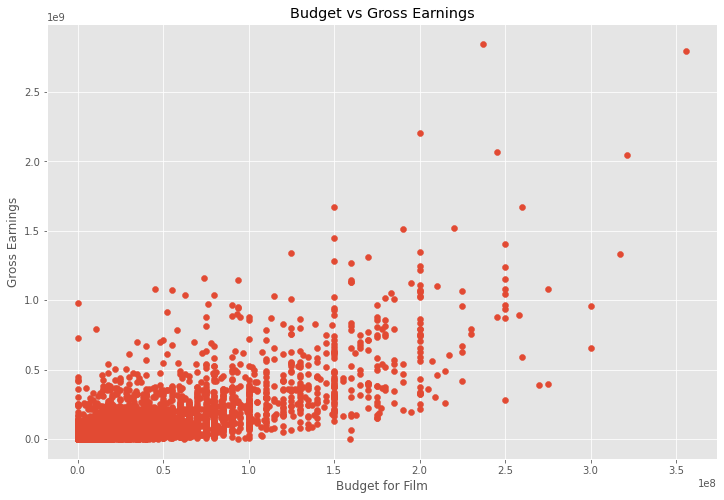

In [14]:
# Scatter plot with budget vs gross

plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs Gross Earnings')
plt.ylabel('Gross Earnings')
plt.xlabel('Budget for Film')
plt.show()

In [15]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime yearcorrect  
5445  2847246203  Twentieth Century Fox    162.0        2009  
7445  2797501328         Marvel Studios    181.0        2019  
3045  2201647264  Twentieth Century Fox    194.0        1997  
6663  2069521700              Lucasfilm    138.0        2015  
7244  2048359754         Marvel Studios    149.0        2018

<AxesSubplot:xlabel='budget', ylabel='gross'>

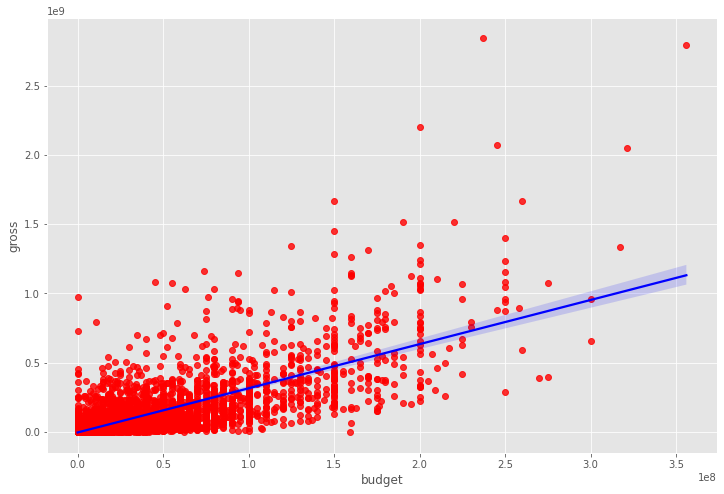

In [16]:
# Plot budget vs gross using seaborn

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {'color': 'red'}, line_kws = {'color' : 'blue'})

In [17]:
# Looking at correlation

df.corr(method = 'pearson') # pearson, kendall, spearman

# high corelation between budget and gross

year     score     votes    budget     gross   runtime
year     1.000000  0.092616  0.222427  0.309212  0.261900  0.116358
score    0.092616  1.000000  0.407101  0.056863  0.186012  0.394564
votes    0.222427  0.407101  1.000000  0.486931  0.632870  0.306984
budget   0.309212  0.056863  0.486931  1.000000  0.750157  0.268372
gross    0.261900  0.186012  0.632870  0.750157  1.000000  0.244339
runtime  0.116358  0.394564  0.306984  0.268372  0.244339  1.000000

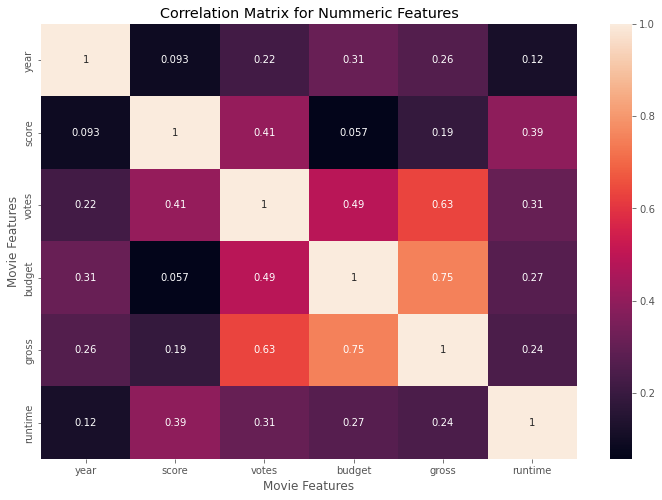

In [18]:
correlation_matrix = df.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Nummeric Features')
plt.ylabel('Movie Features')
plt.xlabel('Movie Features')
plt.show()

In [19]:
# Look at Company
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime yearcorrect  
5445  2847246203  Twentieth Century Fox    162.0        2009  
7445  2797501328         Marvel Studios    181.0        2019  
3045  2201647264  Twentieth Century Fox    194.0        1997  
6663  2069521700              Lucasfilm    138.0        2015  
7244  2048359754         Marvel Studios    149.0        2018

In [20]:
df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

name  rating  genre  year  released  score      votes  director  writer  \
5445   533       6      0  2009       697    7.8  1100000.0      1155    1779   
7445   535       6      0  2019       184    8.4   903000.0       162     744   
3045  6896       6      6  1997       705    7.8  1100000.0      1155    1779   
6663  5144       6      0  2015       699    7.8   876000.0      1125    2551   
7244   536       6      0  2018       193    8.4   897000.0       162     744   
7480  6194       5      2  2019      1489    6.9   222000.0      1455    1920   
6653  2969       6      0  2015      1705    7.0   593000.0       517    3569   
6043  5502       6      0  2012      2473    8.0  1300000.0      1517    2315   
6646  2145       6      0  2015       222    7.1   370000.0      1189     707   
7494  2131       5      2  2019      2677    6.8   148000.0       432    1951   
6644   534       6      0  2015      2236    7.3   777000.0      1517    2315   
7247   791       6      0  2018       960    7.3   661000.0      2457    3796   
5845  2407       6      1  2011      1446    8.1   790000.0       679    4053   
7075  5145       6      0  2017       662    7.0   581000.0      2282    3519   
7271  2970       6      0  2018      1800    6.2   277000.0      1121    1094   
6262  2130       5      2  2013      2716    7.4   585000.0       432    1951   
7072   657       5      7  2017      2023    7.1   283000.0       250    4001   
7281  2760       5      2  2018      1730    7.6   263000.0       303     492   
7055  5833       6      0  2017        62    6.6   214000.0       835    1432   
6244  2823       6      0  2013      2450    7.1   779000.0      2543    1175   
6688  3622       5      2  2015      1396    6.4   218000.0      1639     535   
6846  1056       6      0  2016      2489    7.8   694000.0       162     744   
7250   474       6      0  2018       749    6.9   404000.0      1189     991   
4245  6221       6      0  2003       681    8.9  1700000.0      2193    1746   
7458  5084       6      0  2019      1502    7.5   359000.0      1463     705   
7456  1061       6      0  2019      2214    6.8   478000.0       147     256   
5878  6968       6      0  2011      1871    6.2   390000.0      1886    1238   
6059  4951       6      0  2012      2805    7.7   642000.0      2476    3126   
6494  6967       6      0  2014      1850    5.6   302000.0      1886    1238   
2448  6194       2      2  1994      1812    8.5   970000.0      2415    1703   
6047  5726       6      0  2012      1511    8.4  1600000.0       483    2266   
7463  5141       6      0  2019       732    6.5   394000.0      1125     715   
7450  2930       7      5  2019      3063    8.4  1000000.0      2767    4249   
7488  6949       2      2  2019      1788    7.7   217000.0      1509    2159   
5685  6948       2      2  2010      1753    8.2   776000.0      1678    2159   
4852  4258       6      0  2006      1646    7.3   668000.0       996    4148   
6869  4616       6      0  2016       674    7.8   572000.0       912     718   
7481   290       5      1  2019      2395    6.9   239000.0      1031    2079   
5860  4261       6      0  2011      2351    6.6   492000.0      2341    4148   
7140  1552       5      2  2017      1897    6.3   119000.0      1639     759   
2245  2967       6      0  1993      1690    8.1   894000.0      2660    2932   
6908  1978       5      2  2016      1745    7.3   250000.0       124     216   
3451  5138       5      0  1999      2319    6.5   748000.0       963    1473   
5667   300       5      1  2010      2183    6.4   392000.0      2745    2608   
6863  7504       5      2  2016      2176    8.0   450000.0       362     577   
6045  6001       6      1  2012       652    7.8   773000.0      2193    1360   
3843  2412       5      1  2001      2594    7.6   685000.0       435    1742   
5243  5725       6      0  2008      1477    9.0  2400000.0       483    2266   
5652  2406       6      1  2010      

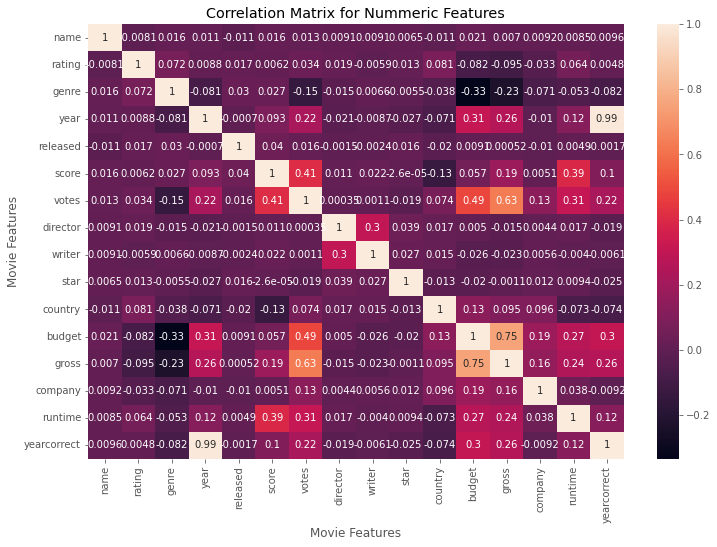

In [21]:
correlation_matrix = df_numerized.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Nummeric Features')
plt.ylabel('Movie Features')
plt.xlabel('Movie Features')
plt.show()

In [22]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011311
             score          0.016377
             votes          0.013038
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.020548
             gross          0.006989
             company        0.009211
             runtime        0.008483
             yearcorrect    0.009553
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.016613
             score          0.006192
             votes          0.033743
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
 

In [23]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget       genre         -0.334021
genre        budget        -0.334021
             gross         -0.234297
gross        genre         -0.234297
genre        votes         -0.145296
votes        genre         -0.145296
score        country       -0.133346
country      score         -0.133346
gross        rating        -0.095450
rating       gross         -0.095450
genre        yearcorrect   -0.082070
yearcorrect  genre         -0.082070
rating       budget        -0.081939
budget       rating        -0.081939
genre        year          -0.081261
year         genre         -0.081261
country      yearcorrect   -0.074166
yearcorrect  country       -0.074166
runtime      country       -0.073319
country      runtime       -0.073319
company      genre         -0.071067
genre        company       -0.071067
year         country       -0.070938
country      year          -0.070938
runtime      genre         -0.052914
genre        runtime       -0.052914
country      genre         -0.037615
g

In [24]:
high_corr = sorted_pairs[sorted_pairs > 0.5]
high_corr

votes        gross          0.632870
gross        votes          0.632870
budget       gross          0.750157
gross        budget         0.750157
yearcorrect  year           0.992136
year         yearcorrect    0.992136
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

Votes and budget have the highest correlation to gross earnings